# Exercise 3 - Sampling

## Objectives
- To understand the effects of sampling in the time and frequency domains 
- To understand why sampling might cause aliasing
- To introduce uniform quantization

In [1]:
import os
os.makedirs('results/ex3', exist_ok=True)

## Lab Exercise
Let us start by thinking about the sampling process in the time domain as shown in Fig. 3.1. It may be interpreted as the multiplication between a continuous-time domain signal $x(t)$ and a train of impulses $s(t)$.

<img src="img/ex2_1.svg" alt="drawing" width="900"/>
<center>Figure 3.1: The sampling process of an continuous-time signal</center>

Observe that $x_s(t) = x(t)\times s(t) = \sum_n x(nT)\delta(t-nT),$ where $-\infty < n < \infty$ and $T=1/f_s$. This is still a continuous-time signal (variable $t$) which are zero-valued for $t \neq nT$ and should not be confused with the discrete-time signal $x[n]$, which comprises the signal amplitudes at the sampling instances and only exists for $n=0,1,2,\cdots$.

Now think about $x(t)$ and $s(t)$ and their frequency domain representations which are shown in Fig. 3.2. 

<img src="img/ex2_2.svg" alt="drawing" width="900"/>
<center>Figure 3.2: Frequency domain representation of $x(t)$ and $s(t)$</center>


You may recall that multiplication in the time domain is equivalent to convolution in the frequency domain. Therefore, the dual of $x_s(t) =x(t) \times s(t)$ in the time domain is $X_s(j\omega) = X(j\omega) * S(j\omega)$ in the frequency domain, where '$*$' denotes the linear convolution. 

Thus, $X_s(j\omega)$ is a periodic function of frequency $\omega$, consisting of the sum of shifted and scaled replicas of $X(j\omega)$, shifted by integer multiples of $\omega_s$ and scaled by $\frac{1}{T}$. 


<img src="img/ex2_3.svg" alt="drawing" width="900"/>
<center>Figure 3.3: A sampled sine wave and its spectrum</center>

### Sampling Theorem

Sampling, therefore, has the effect of creating spectral images at each and every integer multiple of $\omega_s$. Thus, to avoid corruption of information arising from overlapping spectral images (this distortion is called aliasing), the following condition must be met

---
**Definition**:
$$|\omega_m|  < \frac{\omega_s}{2} \: \text{(Nyquist frequency)}, \quad \text{where } \omega_s  =2\pi f_s =2\pi/T_s \quad \implies \quad |\Omega|  < \pi $$

---

The frequency $\omega_s/2$ is called the Nyquist frequency. If $\omega_m$ is the highest frequency component in the signal, then sampling at a rate (frequency) above twice the maximum signal frequency, $\omega_s>|2\omega_m|$, is called *oversampling*. Sampling at a rate below twice this signal frequency, $\omega_s<|2\omega_m|$, is called *undersampling*. Lastly, sampling at a rate exactly twice this maximum signal frequency, $\omega_s=|2\omega_m|$, is called *critical sampling*.

To see aliasing in action, let us generate some more plots using `sinegen` function by setting $N=100$, $f_s=8000$ Hz and varying:

$(\text{i}) \:  f=150$ Hz, $\quad  (\text{ii}) \: f=300$ Hz, $\quad (\text{iii}) \: f=600$ Hz 

$(\text{iv}) \:  f=7400$ Hz, $\quad (\text{v}) \:  f=7700$ Hz $\:$ and $\: (\text{vi}) \:  f=7850$ Hz

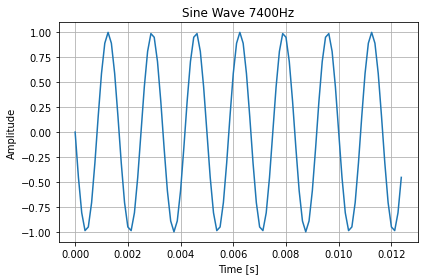

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

fs = 8000
fsig = 7400# change the value of fsig for parts (i) to (vi)
Nsamp = 100
t, x = sinegen(fs, fsig, Nsamp)

plt = plot_signal(t, x, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
plt.show()

The plots created above (e.g. `ex3_sine_150_hz.pdf`) will have also been saved to the `/results/ex3/` folder so you now have a record of all the plots.

**Question 3.1** Describe and discuss the results for (i)-(iii) and (iv)-(vi).

**ANSWER:**

(i) **f=150Hz** which is much less than fs/2 = 4000 Hz. This satisfies the Nyquist criterion and is oversampling. No aliasing as well below the Nyquist frequency.

(ii) **f=300Hz** which is much less than fs/2 = 4000 Hz. This satisfies the Nyquist criterion and is oversampling. No aliasing as well below the Nyquist frequency.


(iii) **f=600Hz** which is much less than fs/2 = 4000 Hz. This satisfies the Nyquist criterion and is oversampling. No aliasing as well below the Nyquist frequency.

(iv) **f=7400** which is much more than fs/2 = 4000 Hz. This is undersampling. Aliasing will occur because the signal frequency is much closer to the Nyquist frequency.

(v) **f=7700Hz** which is much more than fs/2 = 4000 Hz. This is undersampling. Significant aliasing will occur because the signal frequency is much closer to the Nyquist frequency.

(vi) **f=7850Hz** which is much more than fs/2 = 4000 Hz. This is undersampling. Server aliasing will occur because the signal frequency is much closer to the Nyquist frequency.

Note: For undersamplings the signals will be highly distorted, making it challenging to recover the signal. -> this is due to the periodic folding back of frequencies

**Question 3.2** Predict the results for frequencies $f=24150$ Hz, $\: f=24300$ Hz and $\: f=24600$ Hz and confirm your prediction with Python.

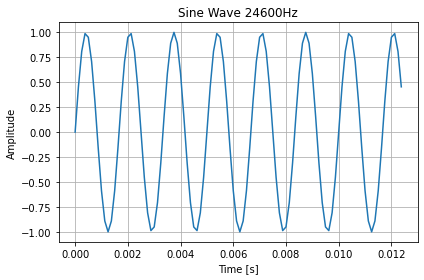

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

fs = 8000
fsig = 24600# change the value of fsig for parts (i) to (vi)
Nsamp = 100
t, x = sinegen(fs, fsig, Nsamp)

plt = plot_signal(t, x, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
plt.show()

**ANSWER:**
$\: falias = | f - kfs | $ 
This formula is the aliased frequency calculation
$fs/2 = 4000 Hz$

(i) **f=24150Hz**: Using the formula, the k integer needed to bring $falias$ within the range [$0, fs/2$] is 24150 - 3 x 8000 = 150Hz. Therefore the high freq 24150 will appear as a low freq alias at 150 Hz

(ii) **f=24300Hz**: Using the formula, the k integer needed to bring $falias$ within the range [$0, fs/2$] is 24300 - 3 x 8000 = 300Hz. Therefore the high freq 24300 will appear as a low freq alias at 300 Hz

(iii) **f=24600Hz**: Using the formula, the k integer needed to bring $falias$ within the range [$0, fs/2$] is 24600 - 3 x 8000 = 600Hz. Therefore the high freq 24600 will appear as a low freq alias at 600 Hz

**Question 3.3** Consider $x(t)=\cos(100\pi t)$
**ANSWER**

$\quad$(a) Determine the minimum sampling rate to avoid aliasing
Minimum is twice the maximum frequency which is $100\pi/2\pi = 50 Hz$ and therefore minimum sampling rate is fs = 2 x 50 = 100 Hz

$\quad$(b) Write down an expression for $x[n]$ if a sampling frequency of 200 Hz is used.
$Ts = 1/fs = 1/200 = 0.005s$
For x[n] we know that this is found as x(t) evaluated at t = nTs
$x[n] = x(nTs) = cos(100nTs\pi)$
$x[n] = cos(100n\pi 0.005) = cos(0.5n\pi) $

$\quad$(c) Write down an expression for $x[n]$ if a sampling frequency of 75 Hz is used.
$Ts = 1/fs = 1/75 = 0.01333s$
For x[n] we know that this is found as x(t) evaluated at t = nTs
$x[n] = x(nTs) = cos(100nTs\pi)$
$x[n] = cos(100n\pi 0.01333) = cos(1.333n\pi) $

However, note that since $fs = 75Hz$ is below the Nyquist sampling rate of 100Hz aliasing will occur.
Which by using the formula | 50 - 75 |  = 25 Hz. So the signal has an effective frequency of 25 Hz therefore 
$x[n] = cos(2n\pi 25 Ts) = cos(0.5n\pi) $ which is the same as (b) but a result of aliasing

**Question 3.4** If the sampling frequency is 48 kHz, what is the normalised angular frequency of the discrete-time signal corresponding to a sinusoid at 1.2 kHz?

**ANSWER**:
We know $wnorm = 2\pi(f/fs)$
So wnorm = $(2\pi 0.025)$
wnorm = $0.05\pi$

**Question 3.5** Given a signal with a normalised angular frequency of $\frac{\pi}{4}$, what is its frequency expressed in terms of the sampling frequency, $f_s$?


**ANSWER**:
By rearranging the eqn 
$f = 0.125fs$

### Uniform quantization change to Q

Sampling is the process by which a continuous-*time* signal, $x(t)$,  becomes a discrete-*time* signal, $x[n]$. Quantization, on the other hand, is the process by which a signal with continuous amplitude is made to assume discrete amplitudes from a defined set of **quantization levels**.

Let us consider a signal $x(t)$ with amplitudes contained in the range $\pm A$. It is quantized using a simple uniform quantizer with $Q$ equally-spaced quantization levels such that the quantization step is $W=\frac{2A}{Q-1}$. The quantized signal $x_q(t)$ is obtained by rounding the amplitude of $x(t)$ to the closest quantization level, or equivalently
$$x_q(t)=W\cdot \text{round}\big(\frac{x(t)}{W}\big)$$

For example, for $A=10$ and $Q=21$, the quantization step is $W=1$ and an amplitude of $x(\tau)=9.2$ would lead to $x_q(\tau)=9$.

The quantization error is the difference between the original signal $x(t)$ and the quantized signal $x_q(t)$. 

<img src="img/ex3_quant.svg" alt="drawing" width="900"/>
<center>Figure 3.4: The sampling and quantization processes</center>

**Question 3.6** For the example above ($A=10$, $Q=21$, and $W=1$), give the maximum and minimum values that the quantization error can take.

**ANSWER**: 
The example quantization error is 0.2
Range: The quantization error can vary within half of the step size on either side of a quantization level.

Max = +W/2 =  +0.5 
Min = -W/2 =   -0.5 

**Question 3.7** Implement the simple quantizer described above using your own `quantizer` function in the cell below. Plot a sine wave of amplitude $10$ quantized using $21$ levels.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def quantizer(x, dynrange, N):
    """
    Quantize the input signal x using uniform quantization.
    
    Args:
        x (np.array): Input signal to quantize.
        dynrange (tuple): A tuple representing the minimum and maximum values (min, max).
        N (int): Number of quantization levels.
        
    Returns:
        np.array: Quantized signal.
    """
    # Unpack the dynamic range
    min_val, max_val = dynrange
    
    # Calculate the quantization step size
    W = (max_val - min_val) / (N - 1)
    
    # Quantize the signal
    y = np.clip(W * np.round((x - min_val) / W), min_val, max_val)  # Ensure y is within the dynamic range
    
    return y


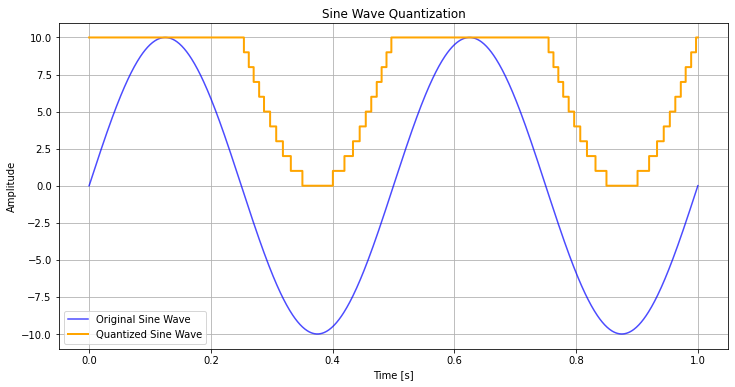

In [18]:
# plot a quantized sine wave here

# Parameters
A = 10              # Amplitude
N = 21              # Number of quantization levels
fs = 1000           # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector for 1 second
f = 2               # Frequency of the sine wave in Hz

# Generate a sine wave
x_t = A * np.sin(2 * np.pi * f * t)

# Define dynamic range
dynrange = (-A, A)

# Quantize the sine wave
x_q = quantizer(x_t, dynrange, N)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, x_t, label='Original Sine Wave', color='blue', alpha=0.7)
plt.step(t, x_q, label='Quantized Sine Wave', color='orange', where='post', linewidth=2)
plt.title('Sine Wave Quantization')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.ylim(-A-1, A+1)
plt.grid()
plt.legend()
plt.show()

**Question 3.8** Plot the quantization error for the sine wave in Question 3.7. Does your result match your answer to Question 3.6? What is the root mean square (RMS) error? Compare this to Exercise 8 of Problem Sheet 3.

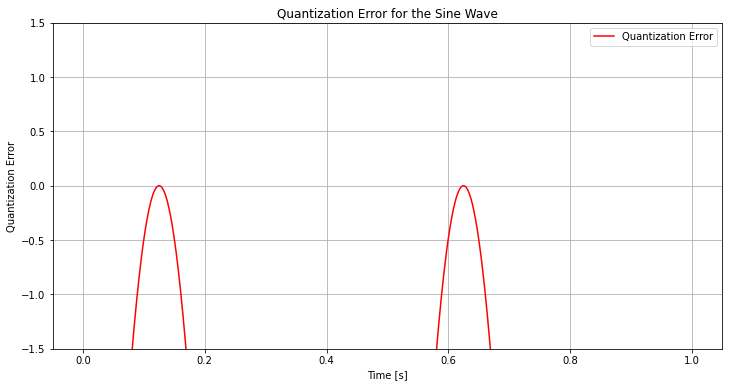

Root Mean Square (RMS) Error: 7.8277


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def quantizer(x, dynrange, N):
    """Quantizes the input signal x using uniform quantization."""
    min_val, max_val = dynrange
    W = (max_val - min_val) / (N - 1)  # Calculate quantization step size
    y = np.clip(W * np.round((x - min_val) / W), min_val, max_val)  # Quantize the signal
    return y

# Parameters
A = 10              # Amplitude
N = 21              # Number of quantization levels
fs = 1000           # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector for 1 second
f = 2               # Frequency of the sine wave in Hz

# Generate a sine wave
x_t = A * np.sin(2 * np.pi * f * t)

# Define dynamic range
dynrange = (-A, A)

# Quantize the sine wave
x_q = quantizer(x_t, dynrange, N)

# Calculate the quantization error
quantization_error = x_t - x_q

# Calculate RMS error
rms_error = np.sqrt(np.mean(quantization_error**2))

# Plotting the quantization error
plt.figure(figsize=(12, 6))
plt.plot(t, quantization_error, label='Quantization Error', color='red')
plt.title('Quantization Error for the Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Quantization Error')
plt.ylim(-1.5, 1.5)  # Set y-axis limits to capture expected error range
plt.grid()
plt.legend()
plt.show()

# Display RMS error
print(f'Root Mean Square (RMS) Error: {rms_error:.4f}')


**ANSWER**:
The max and min as in 3.6 were +0.5 and -0.5 which is within the range

The RMS error calculate will provide an average measure of the quantization error magnitude